# Regresión lineal y logística en ML

## Regresión lineal

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import scipy.stats as stats
import statsmodels.api as sm

# Read the train and test dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
X = df.drop('target', axis=1)
X = X[['mean radius','mean symmetry']]
y = df['target']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   mean radius  mean symmetry
0        17.99         0.2419
1        20.57         0.1812
2        19.69         0.2069
3        11.42         0.2597
4        20.29         0.1809
(569, 2)
   mean radius  target
0        17.99       0
1        20.57       0
2        19.69       0
3        11.42       0
4        20.29       0
(569, 2)



Coefﬁcient of model : [[ 1.00000000e+00 -6.14141360e-16]
 [-9.31815350e-02 -4.32365252e+00]]

Intercept of model [-8.88178420e-15  2.72708211e+00]


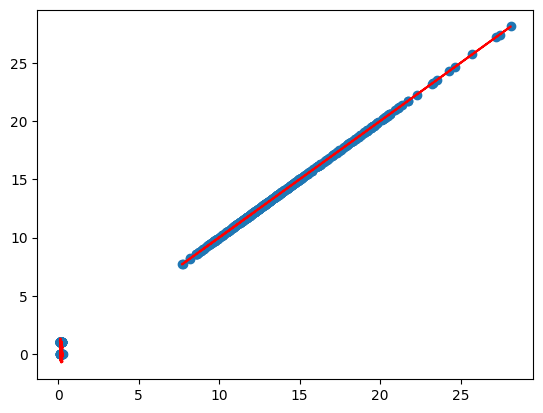

In [3]:
# Create the object of the Linear Regression model
Linear_model = LinearRegression()

# Fit the model with the training data
Linear_model.ﬁt(X_train,y_train)

# Coefﬁcients of the trained model
print('\nCoefﬁcient of model :', Linear_model.coef_)

# Intercept of the model
print('\nIntercept of model',Linear_model.intercept_)

# How good is the ﬁt
plt.scatter(X_train, y_train)
plt.plot(X_train, Linear_model.predict(X_train), color = 'red')

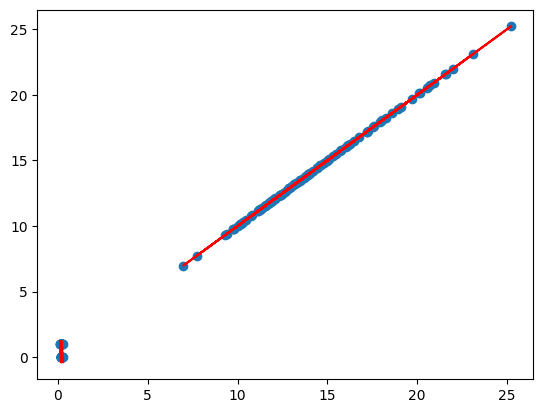

In [4]:
# Predict the target on the test dataset
predict_test = Linear_model.predict(X_test)

# Test data and predicted data
plt.scatter(X_test, y_test)
plt.plot(X_test, Linear_model.predict(X_test), color = 'red')

In [5]:
# Evaluating the Algorithm
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

### Diagnostic plots

In [31]:
def linear_regression(X) -> X:
    """Perform a univariate regression and store results in a new data frame.

    Args:
        df (DataFrame): orginal data set with x and y.

    Returns:
        DataFrame: another dataframe with raw data and results.
    """
    mod = sm.OLS(endog=X['mean radius'], exog=X['mean symmetry']).fit()
    influence = mod.get_influence()

    res = X.copy()
    res['resid'] = mod.resid
    res['fittedvalues'] = mod.fittedvalues
    res['resid_std'] = mod.resid_pearson
    res['leverage'] = influence.hat_matrix_diag
    return res
    

In [45]:
modelo = linear_regression(X)

In [46]:
def plot_diagnosis(modelo):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    plt.style.use('ggplot')

    # Residual against fitted values.
    modelo.plot.scatter(
        x='fittedvalues', y='resid', ax=axes[0, 0]
    )
    axes[0, 0].axhline(y=0, color='grey', linestyle='dashed')
    axes[0, 0].set_xlabel('Fitted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Fitted')

    # qqplot
    sm.qqplot(
        modelo['resid'], dist=stats.t, fit=True, line='45',
        ax=axes[0, 1], c='#4C72B0'
    )
    axes[0, 1].set_title('Normal Q-Q')

    # The scale-location plot.
    modelo.plot.scatter(
        x='fittedvalues', y='resid_std', ax=axes[1, 0]
    )
    axes[1, 0].axhline(y=0, color='grey', linestyle='dashed')
    axes[1, 0].set_xlabel('Fitted values')
    axes[1, 0].set_ylabel('Sqrt(|standardized residuals|)')
    axes[1, 0].set_title('Scale-Location')

    # Standardized residuals vs. leverage
    modelo.plot.scatter(
        x='leverage', y='resid_std', ax=axes[1, 1]
    )
    axes[1, 1].axhline(y=0, color='grey', linestyle='dashed')
    axes[1, 1].set_xlabel('Leverage')
    axes[1, 1].set_ylabel('Sqrt(|standardized residuals|)')
    axes[1, 1].set_title('Residuals vs Leverage')

    plt.tight_layout()
    plt.show()

In [47]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/home/jupyter-user9/.local/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


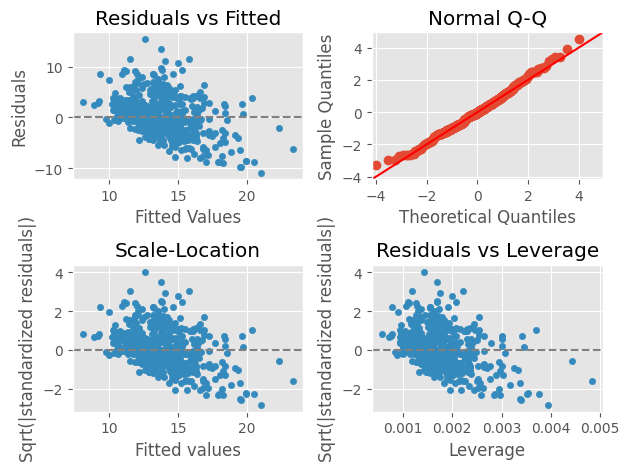

In [48]:
plot_diagnosis(modelo)

## Regresión logística

### Training a Binary Classifier

In [13]:
# Load libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

print(features_standardized)
print(target)

[[-5.81065904e-01  8.41837140e-01 -1.01297765e+00 -1.04211089e+00]
 [-8.94308978e-01 -2.07835104e-01 -1.01297765e+00 -1.04211089e+00]
 [-1.20755205e+00  2.12033793e-01 -1.08231219e+00 -1.04211089e+00]
 [-1.36417359e+00  2.09934449e-03 -9.43643106e-01 -1.04211089e+00]
 [-7.37687441e-01  1.05177159e+00 -1.01297765e+00 -1.04211089e+00]
 [-1.11201292e-01  1.68157493e+00 -8.04974023e-01 -6.86441647e-01]
 [-1.36417359e+00  6.31902691e-01 -1.01297765e+00 -8.64276271e-01]
 [-7.37687441e-01  6.31902691e-01 -9.43643106e-01 -1.04211089e+00]
 [-1.67741667e+00 -4.17769553e-01 -1.01297765e+00 -1.04211089e+00]
 [-8.94308978e-01  2.09934449e-03 -9.43643106e-01 -1.21994552e+00]
 [-1.11201292e-01  1.26170604e+00 -9.43643106e-01 -1.04211089e+00]
 [-1.05093052e+00  6.31902691e-01 -8.74308565e-01 -1.04211089e+00]
 [-1.05093052e+00 -2.07835104e-01 -1.01297765e+00 -1.21994552e+00]
 [-1.83403820e+00 -2.07835104e-01 -1.22098127e+00 -1.21994552e+00]
 [ 5.15284858e-01  1.89150938e+00 -1.15164673e+00 -1.04211089e

In [14]:
# Create logistic regression object
logistic_regression = LogisticRegression(random_state=0)

# Train model
model = logistic_regression.fit(features_standardized, target)

# Coefﬁcients of the trained model
print('Coefﬁcient of model :', model.coef_)

# Intercept of the model
print('Intercept of model',model.intercept_)

Coefﬁcient of model : [[ 0.82618731 -1.15824998  1.52836551  1.53896841]]
Intercept of model [0.16638974]


In [15]:
# Create new observation
new_observation = [[.5, .5, .5, .5]]

# Predict class
predict_test = model.predict(new_observation)
print('Target on test data',predict_test)
# our observation was predicted to be class 1

# View predicted probabilities
model.predict_proba(new_observation)
# our observation had a 17.7% chance of being class 0 and an 82.2% chance of being class 1

# Accuracy Score on test dataset
#accuracy_test = accuracy_score(test_y,predict_test)
#print('accuracy_score on test dataset : ', accuracy_test)
#print(confusion_matrix(test_y,predict_test))

Target on test data [1]


array([[0.17740549, 0.82259451]])

### Training a Multiclass Classifier: OvR

In [21]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create one-vs-rest logistic regression object
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")
#OneVsRestClassifier(LogisticRegression(random_state=0))

# Train model
model = logistic_regression.fit(features_standardized, target)

# Coefﬁcients of the trained model
print('Coefﬁcient of model :', model.coef_)

# Intercept of the model
print('Intercept of model',model.intercept_)

# Create new observation
new_observation = [[.5, .5, .5, .5]]

# Predict class
predict_test = model.predict(new_observation)
print('Target on test data',predict_test)

# View predicted probabilities
model.predict_proba(new_observation)

Coefﬁcient of model : [[-1.05603354  1.22597119 -1.76482206 -1.62922907]
 [ 0.13599151 -1.27438121  0.79705947 -0.91626954]
 [ 0.14017374 -0.51464011  2.48068262  3.14066798]]
Intercept of model [-2.4782882  -0.9387282  -3.80186027]
Target on test data [2]


/opt/conda/envs/umap/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


array([[0.0387829 , 0.40665354, 0.55456356]])

### Training a Multiclass Classifier: Multinomial Logistic Regression

In [22]:
# Create one-vs-rest logistic regression object
logistic_regression = LogisticRegression(random_state=0, multi_class="multinomial")

# Train model
model = logistic_regression.fit(features_standardized, target)

# Coefﬁcients of the trained model
print('Coefﬁcient of model :', model.coef_)

# Intercept of the model
print('Intercept of model',model.intercept_)

# Create new observation
new_observation = [[.5, .5, .5, .5]]

# Predict class
predict_test = model.predict(new_observation)
print('Target on test data',predict_test)

'''One practical advantage of MLR is that its predicted probabilities using the
predict_proba method are more reliable (i.e., better calibrated).'''

# View predicted probabilities
model.predict_proba(new_observation)

Coefﬁcient of model : [[-1.07659238  1.15977648 -1.92814138 -1.81227307]
 [ 0.5899243  -0.36263595 -0.36461312 -0.82700241]
 [ 0.48666809 -0.79714052  2.2927545   2.63927548]]
Intercept of model [-0.20463897  2.07455834 -1.86991938]
Target on test data [1]


/opt/conda/envs/umap/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


array([[0.0198333 , 0.74472208, 0.23544462]])

### Reducing Variance Through Regularization

In [23]:
''' LogisticRegressionCV’s parameter Cs can either accept a range of values for C to search
over (if a list of floats is supplied as an argument) or, if supplied an integer, will 
generate a list of that many candidate values drawn from a logarithmic scale between 
–10,000 and 10,000.'''

# Create decision tree regression object
logistic_regression = LogisticRegressionCV(penalty='l2', Cs=10, random_state=0, n_jobs=1)

# Train model
model = logistic_regression.fit(features_standardized, target)

# Coefﬁcients of the trained model
print('Coefﬁcient of model :', model.coef_)

# Intercept of the model
print('Intercept of model',model.intercept_)

# Create new observation
new_observation = [[.5, .5, .5, .5]]

# Predict class
predict_test = model.predict(new_observation)
print('Target on test data',predict_test)

# View predicted probabilities
model.predict_proba(new_observation)

Coefﬁcient of model : [[-1.95545929  2.14492589 -4.27975939 -4.05341762]
 [ 1.55986398 -0.35630069 -1.98088253 -1.64611994]
 [ 0.39559531 -1.7886252   6.26064191  5.69953755]]
Intercept of model [ 0.16098417  4.90722766 -5.06821183]
Target on test data [1]


array([[4.82176926e-04, 9.69649759e-01, 2.98680642e-02]])

### Training a Classifier on Very Large Data

In [19]:
''' Stochastic average gradient descent allows us to train a model much faster than other 
solvers when our data is very large. However, it is also very sensitive to feature scaling, 
so standardizing our features is particularly important. We can set our learning algorithm 
to use this solver by setting solver="sag".'''

# Create logistic regression object
logistic_regression = LogisticRegression(random_state=0, solver="sag")

# Train model
model = logistic_regression.fit(features_standardized, target)

# Coefﬁcients of the trained model
print('Coefﬁcient of model :', model.coef_)

# Intercept of the model
print('Intercept of model',model.intercept_)

# Create new observation
new_observation = [[.5, .5, .5, .5]]

# Predict class
predict_test = model.predict(new_observation)
print('Target on test data',predict_test)

# View predicted probabilities
model.predict_proba(new_observation)

Coefﬁcient of model : [[-1.07413073  1.16019168 -1.93068869 -1.81157547]
 [ 0.58798813 -0.36198267 -0.363547   -0.82635294]
 [ 0.4861426  -0.79820901  2.29423569  2.63792841]]
Intercept of model [-0.20511258  2.07487102 -1.86975844]
Target on test data [1]


array([[0.01982892, 0.74492178, 0.23524931]])

### Handling Imbalanced Classes

In [20]:
'''If we have highly imbalanced classes and have not addressed it during preprocessing, 
we have the option of using the class_weight parameter to weight the classes to make certain 
we have a balanced mix of each class. Specifically, the balanced argument will automatically 
weigh classes inversely proportional to their frequency.'''

# Load libraries
import numpy as np

# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create decision tree regression object
logistic_regression = LogisticRegression(random_state=0, class_weight="balanced")

# Train model
model = logistic_regression.fit(features_standardized, target)

# Coefﬁcients of the trained model
print('Coefﬁcient of model :', model.coef_)

# Intercept of the model
print('Intercept of model',model.intercept_)

# Create new observation
new_observation = [[.5, .5, .5, .5]]

# Predict class
predict_test = model.predict(new_observation)
print('Target on test data',predict_test)

# View predicted probabilities
model.predict_proba(new_observation)

Coefﬁcient of model : [[ 0.86392182 -0.80884291  1.63574844  1.33022845]]
Intercept of model [4.92770896]
Target on test data [1]


array([[0.00159667, 0.99840333]])